In [23]:
from LevyCurve import LevyCCurve
import matplotlib.pyplot as plt
import numpy as np

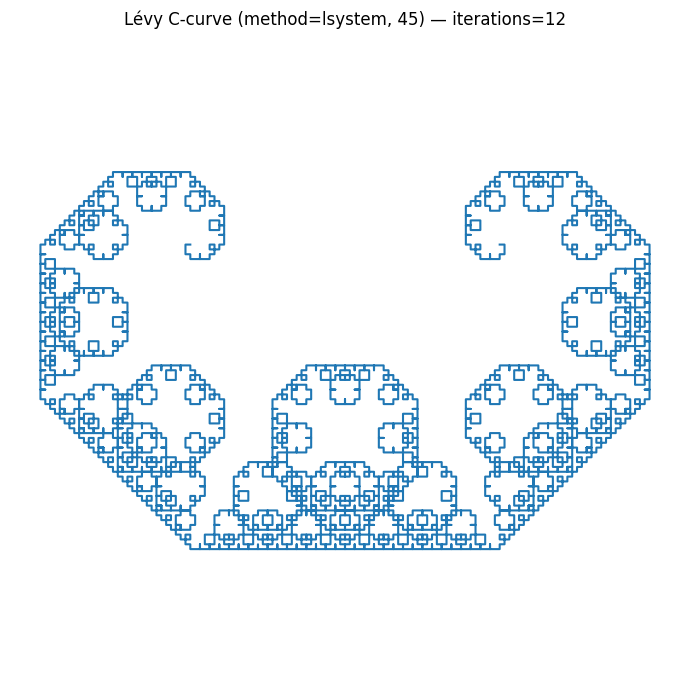

In [24]:
levy = LevyCCurve(iterations=12, angle_deg=45, method="lsystem")

levy.generate()
levy.plot(figsize=(7,7), linewidth=1.5)

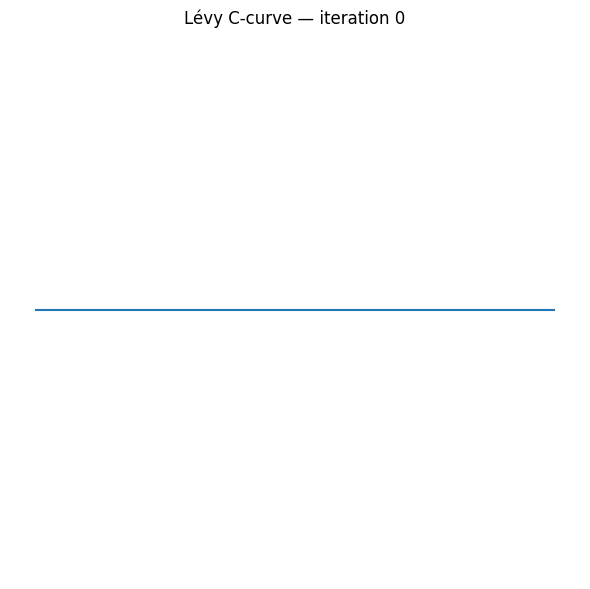

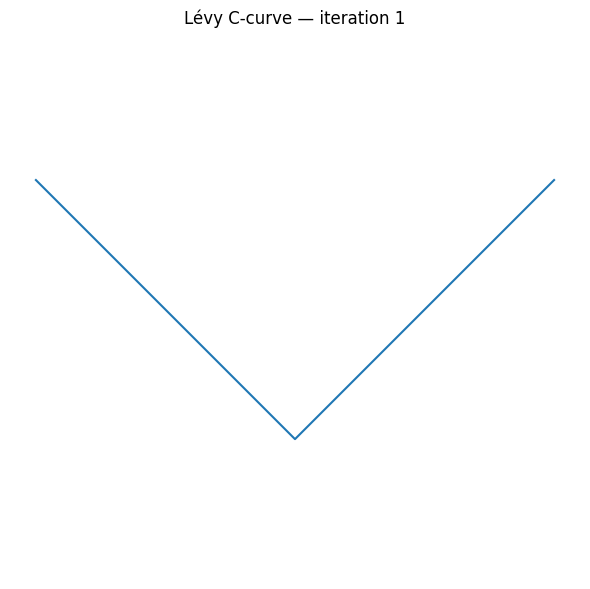

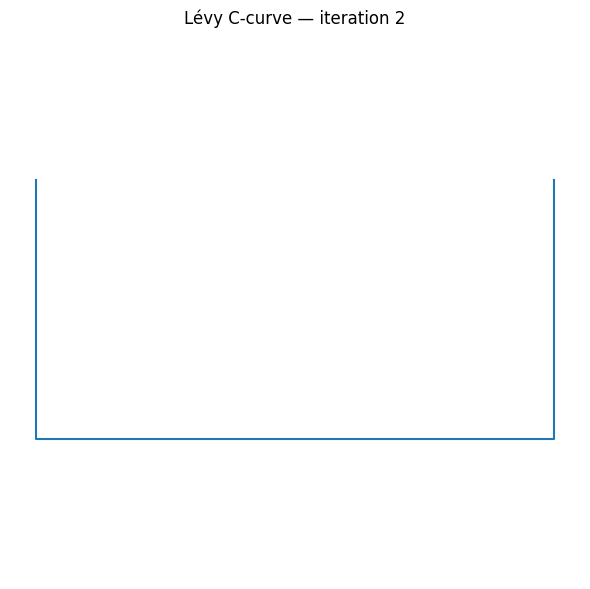

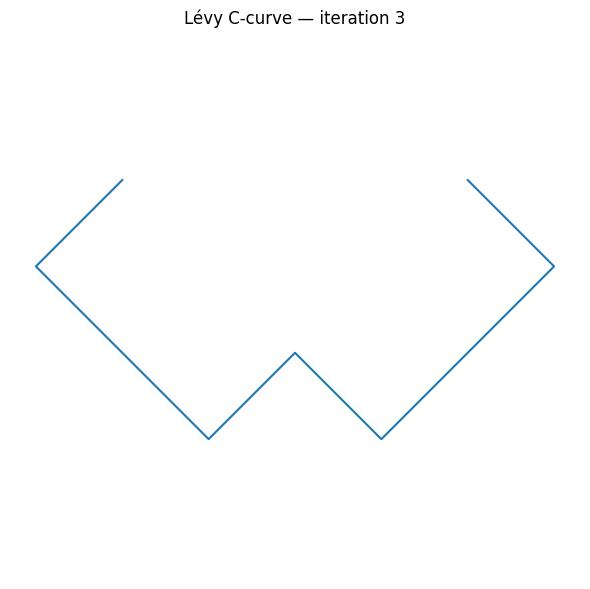

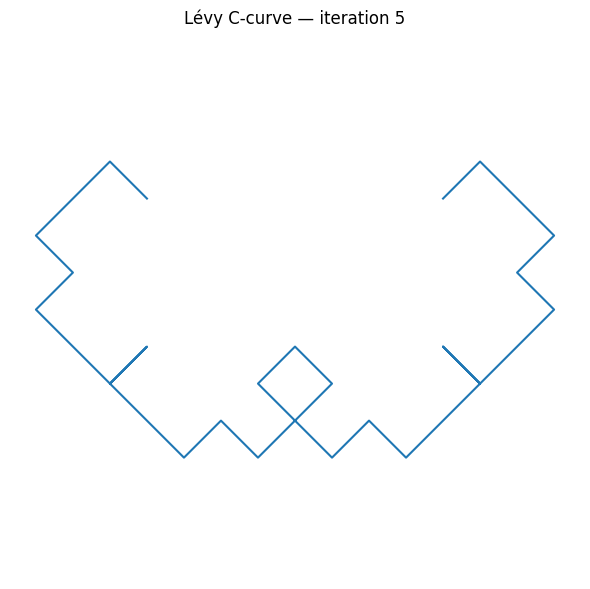

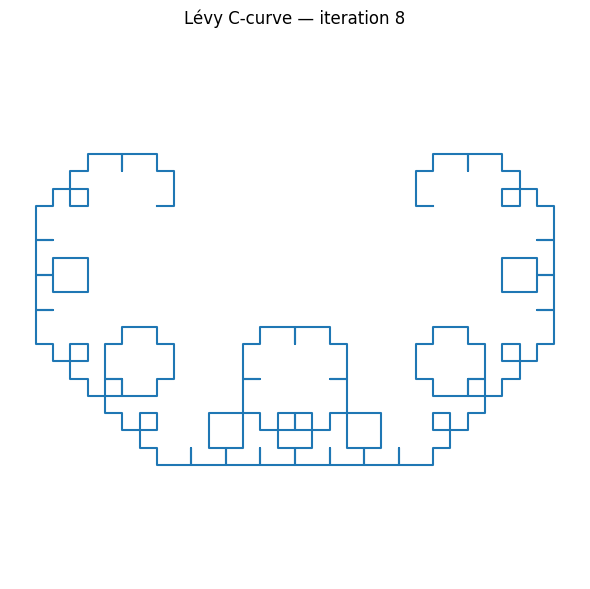

In [25]:
iteration_values = [0, 1, 2, 3, 5, 8]

for i in iteration_values:
    levy = LevyCCurve(iterations=i, method="lsystem")
    levy.generate()
    
    plt.figure(figsize=(6,6))
    xs, ys = zip(*levy.points)
    plt.plot(xs, ys, linewidth=1.5)
    plt.axis('equal')
    plt.axis('off')
    plt.title(f"Lévy C-curve — iteration {i}", pad=12)
    plt.tight_layout()
    plt.show()

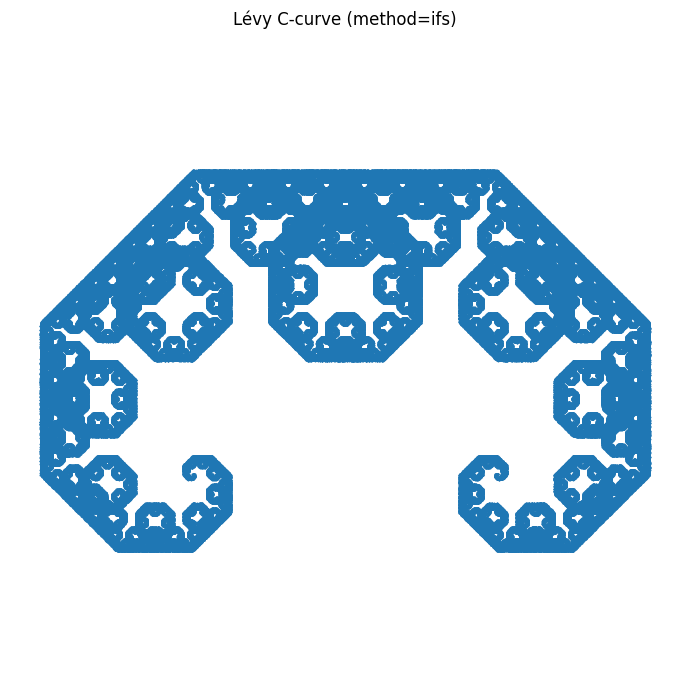

In [26]:
from LevyCurve import LevyCCurve

levy = LevyCCurve(method="ifs", n_points=1000000)

levy.generate()
levy.plot(figsize=(7,7))

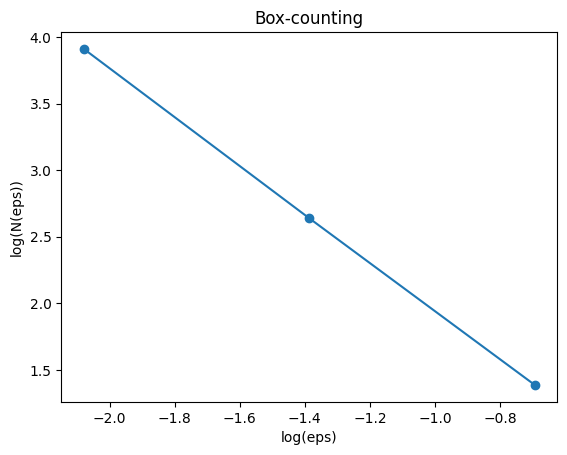

Szacowany wymiar ~ 1.8219280948873624 
Teorytyczny (Hausdorfa) ≈ 1.934


In [29]:
def box_counting_dimension(points, min_exp=3, max_exp=8):
    pts = np.array(points, dtype=float)
    mins = pts.min(axis=0)
    maxs = pts.max(axis=0)
    rng = (maxs - mins)
    rng[rng == 0] = 1.0
    pts01 = (pts - mins) / rng

    epsilons = []
    N = []
    for k in range(min_exp, max_exp+1):
        m = 2**k 
        eps = 1.0 / m
        idx = np.minimum((pts01 * m).astype(int), m-1)
        keys = idx[:,0] + m * idx[:,1]
        unique = np.unique(keys)
        epsilons.append(eps)
        N.append(len(unique))

    epsilons = np.array(epsilons, dtype=float)
    N = np.array(N, dtype=float)

    A = np.vstack([ -np.log(epsilons), np.ones_like(epsilons) ]).T
    D, c = np.linalg.lstsq(A, np.log(N), rcond=None)[0]

    plt.figure()
    plt.plot(np.log(epsilons), np.log(N), marker='o')
    plt.xlabel('log(eps)')
    plt.ylabel('log(N(eps))')
    plt.title('Box-counting')
    plt.show()

    return epsilons, N, D

_, _, D_levy = box_counting_dimension(levy.points, min_exp=1, max_exp=3)
print('Szacowany wymiar ~', D_levy,'\nTeorytyczny (Hausdorfa) ≈ 1.934')


##Modyfikacje

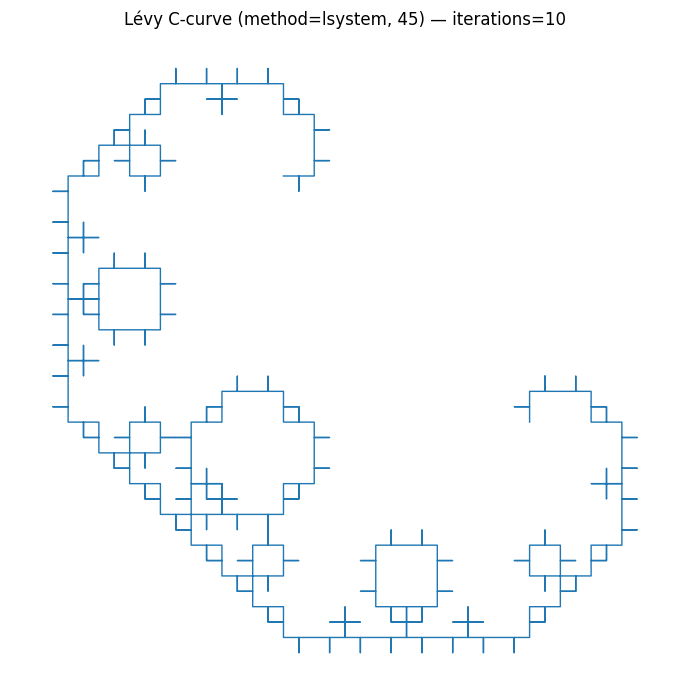

In [ ]:


levy = LevyCCurve(iterations=10, angle_deg=45, method="lsystem", lsystem_rules={"F": "-F+--+F-"})

levy.generate()
levy.plot(figsize=(7,7), linewidth=1.0)
